# Classificação de preços de aparelhos celulares

###A classificação será feita em quatro classes, de acordo com as especificações técnicas de cada aparelho.

Conectando Colab ao Google Drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando DataFrames

In [37]:
import pandas as pd

train = pd.read_csv(r'/content/drive/MyDrive/Projetos/Mobile Price Classification/train.csv')
test = pd. read_csv(r'/content/drive/MyDrive/Projetos/Mobile Price Classification/train.csv')

Analisando os dados

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

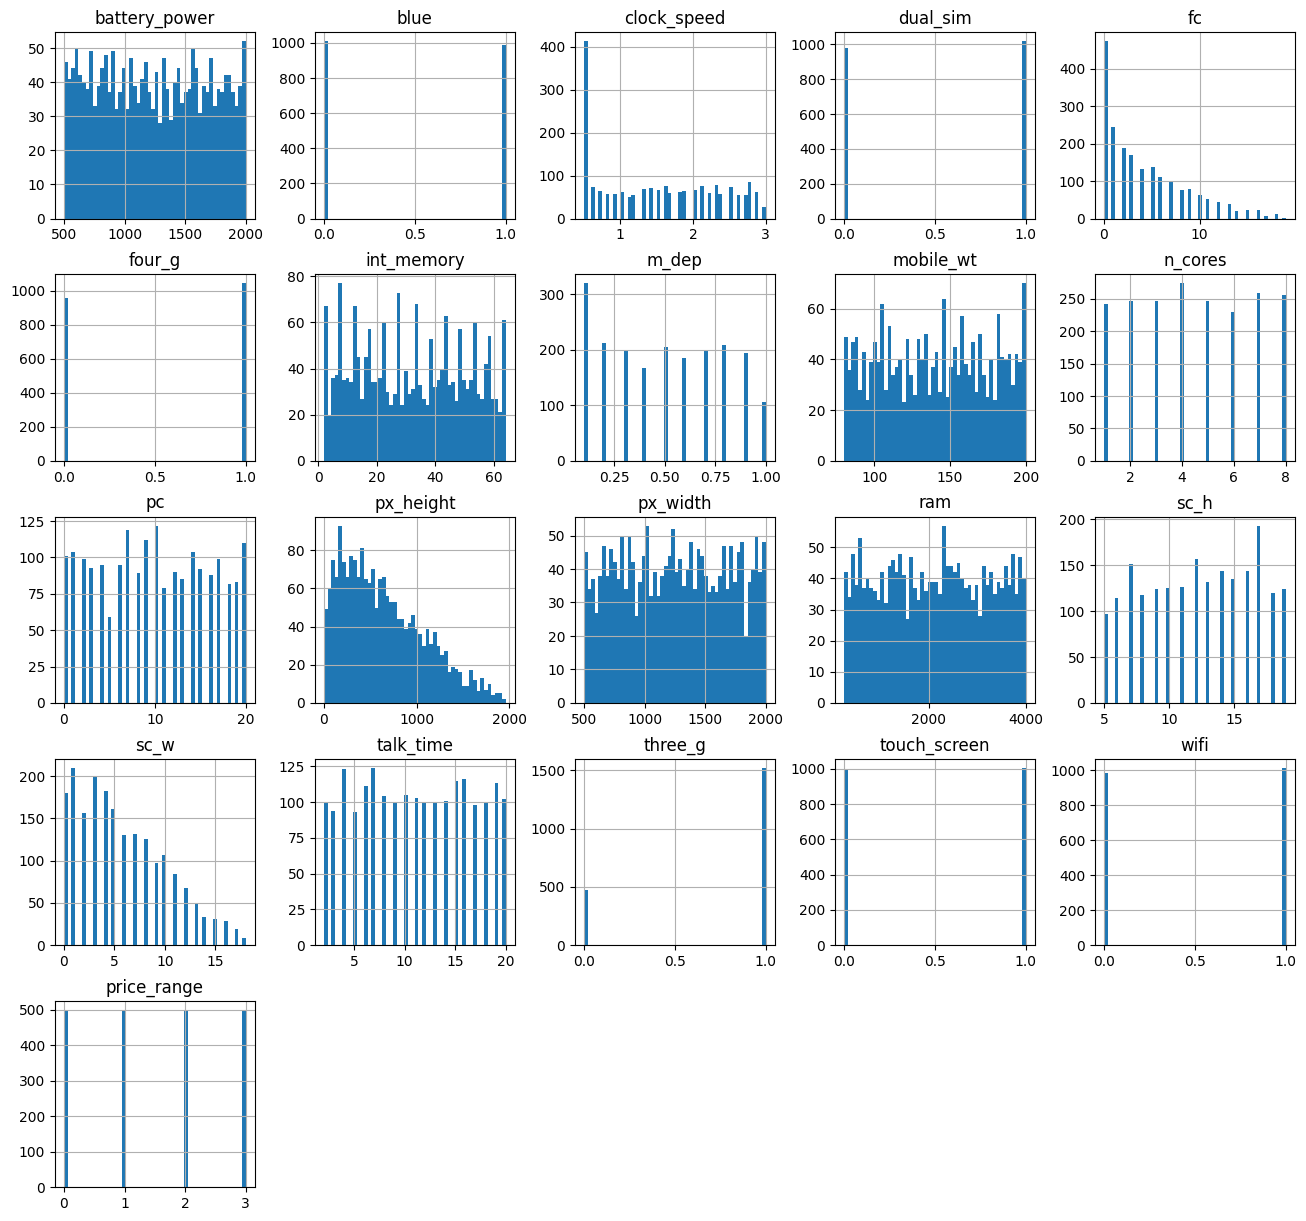

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

train.hist(figsize=(16,15), bins=50)
plt.show()

Analisando correlações

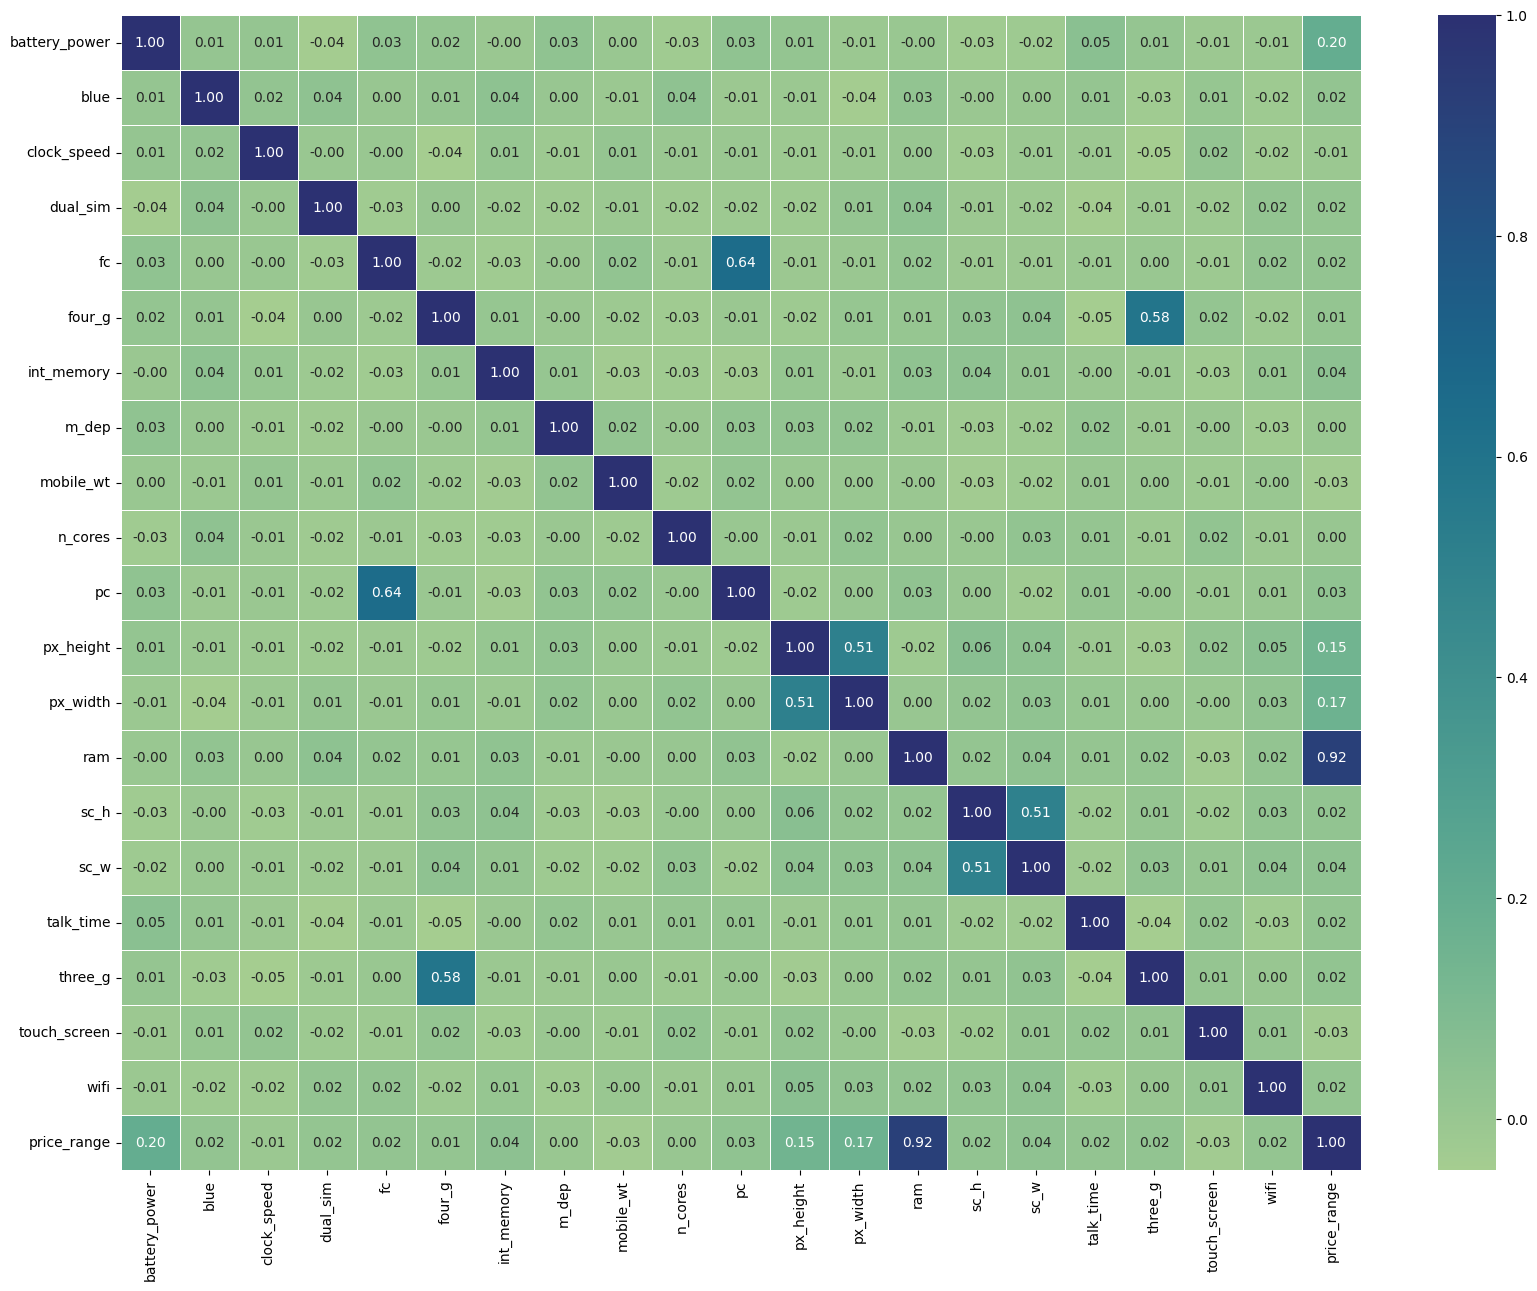

In [40]:
ax = plt.figure(figsize=(20,15))
ax = sns.heatmap(data=train.corr(), fmt=".2f", linewidths=0.5, cmap='crest', annot=True,)
plt.show()

In [41]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

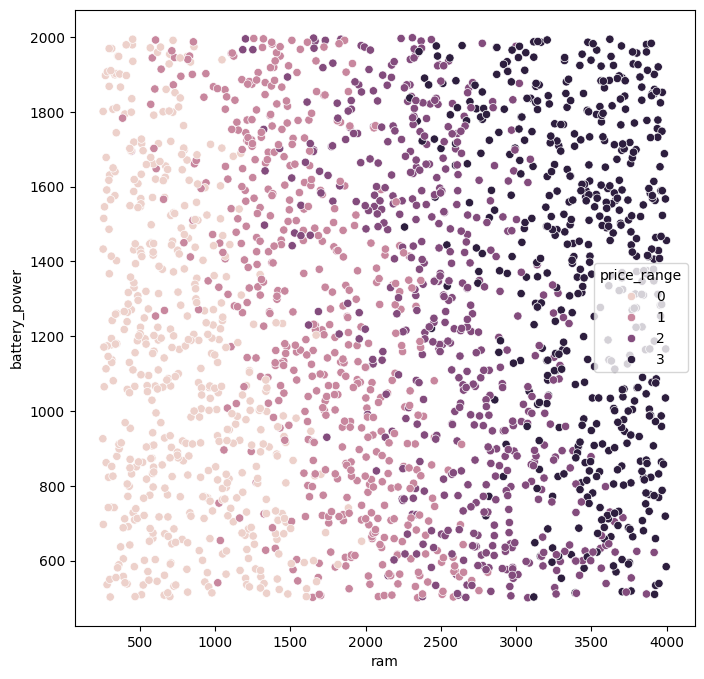

In [42]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = train, x = 'ram', y = 'battery_power', hue = 'price_range')
plt.show()

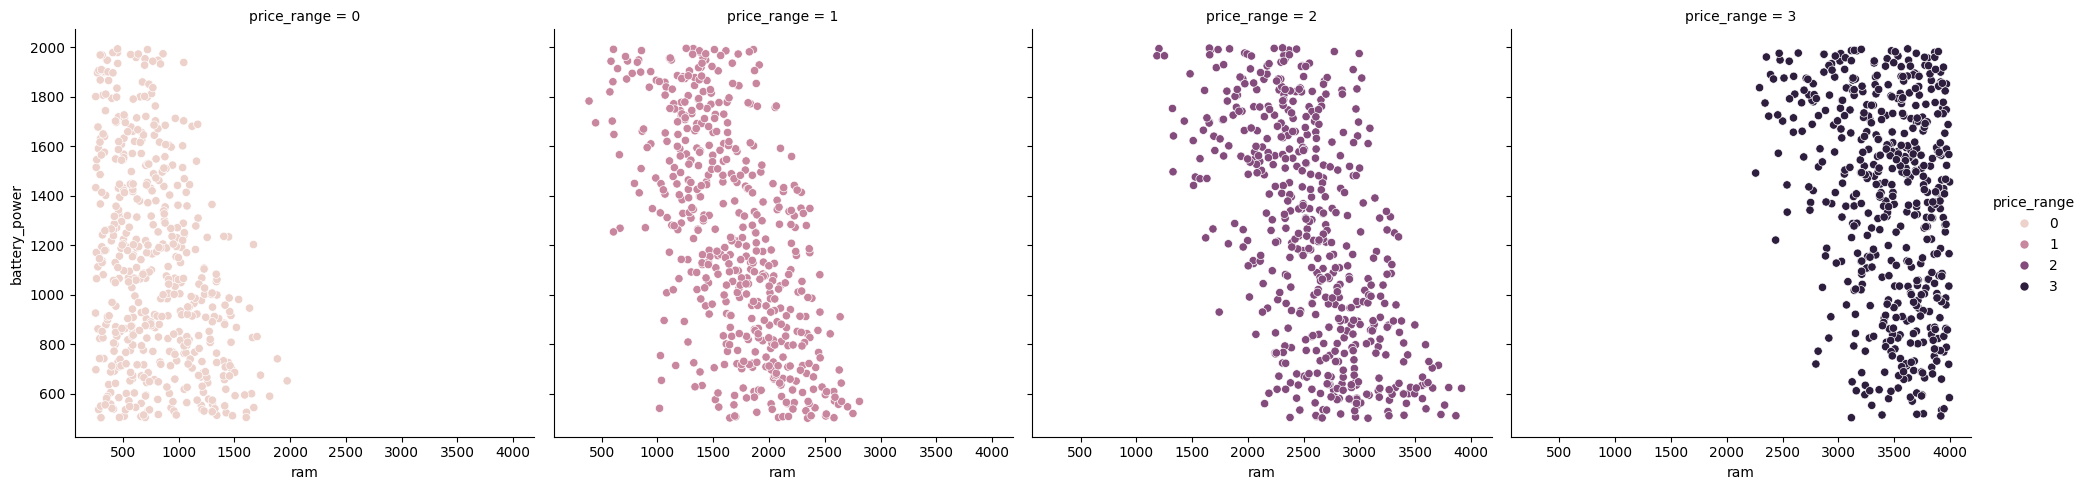

In [43]:
sns.relplot(data = train, x = 'ram', y = 'battery_power', col = 'price_range', hue= 'price_range')
plt.show()

Preparando dados para aplicar modelos de *ML*

In [44]:
# Fixando SEED e separando DataFrame de treino e test

import numpy as np
from sklearn.model_selection import train_test_split

X = train.drop(columns='price_range')
y = train.price_range


SEED = 1234
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=SEED, stratify = y   )

In [45]:
# Escalonando dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Definindo linha de base
from sklearn.dummy import DummyClassifier
model = DummyClassifier()
var_train = model.fit(X_train, y_train)
var_score = var_train.score(X_test, y_test)

print(f'A BaseLine é de {var_score*100:.2f}%')

A BaseLine é de 25.00%


Aplicando Modelos

In [47]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
var_train = model.fit(X_train, y_train)
var_score = var_train.score(X_test, y_test)

print(f'A Acuracy do modelo de DecisionTreeClassifier foi de {var_score*100:.2F}%')

A Acuracy do modelo de DecisionTreeClassifier foi de 84.67%


In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
var_train = model.fit(X_train, y_train)
var_score = var_train.score(X_test, y_test)

print(f'A Acuracy do modelo RandomForestClassifier foi de {var_score*100:.2f}%')

A Acuracy do modelo RandomForestClassifier foi de 86.67%


Aplicando modelo aos dados

In [49]:
test_2 = test.drop(columns='price_range')
test_3 = test.price_range

modelo = model.fit(X_train, y_train)


In [50]:
test['Price_predict'] = modelo.predict(test_2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [51]:
test['Acerto'] = test['price_range'] - test['Price_predict']
acerto_real = 100 - (test['Acerto'] != 0).sum() / (test['Acerto'] == 0).sum()

print(f'O modelo apresentou um acerto real de {acerto_real:.2F}%')

O modelo apresentou um acerto real de 97.00%
